In [97]:
%matplotlib inline
import os
os.environ['THEANO_FLAGS'] = 'device=gpu'
import sys
sys.path.append('..')
import h5py
from keras.models import model_from_json
import numpy as np
from skimage.transform import resize
import matplotlib.pyplot as plt
from tools.common import disp_grid
from IPython.display import Image
from skimage.io import imsave
import json
def resize_func(img, w=64, h=64):
    img = resize(img, (h, w), preserve_range=True)
    return img

In [ ]:
folder = '../tools/models/external/sketchy/'
model = model_from_json(open(folder + 'model.json', 'r').read())
model.load_weights(folder + 'model.pkl')
print(model.input_shape)
print(model.output_shape)

In [84]:
f = h5py.File('../exported_data/datasets/jobset83.hdf5')

In [90]:
keys = [
    '73da00fd56f4bba3a9cf4502d045ef70',
    '7b7311a13a7d2df8b64c9d5ea5f253e1',
    '517302ec5da070804fd729e9bd44fdc8',
    'c0ec9a6c889f693ea2e1f4054c0c481a',
    'f5c0b9f85a131b270e4b3cf54bf113c3'
]

In [91]:
X = []
for key in keys:
    if key not in f['X'].attrs:
        continue
    attr = f['X'].attrs[key]
    d = json.loads(attr)
    start = d['start']
    end = d['end']
    x = f['X'][start:end]
    X.append(x)
X = np.concatenate(X, axis=0)
X = X[:, 0]
X = np.array(map(resize_func, X))
X = X[:, np.newaxis, :, :]

In [92]:
y = model.predict(X)

In [93]:
ent = (-y * np.log(y)).sum(axis=1)

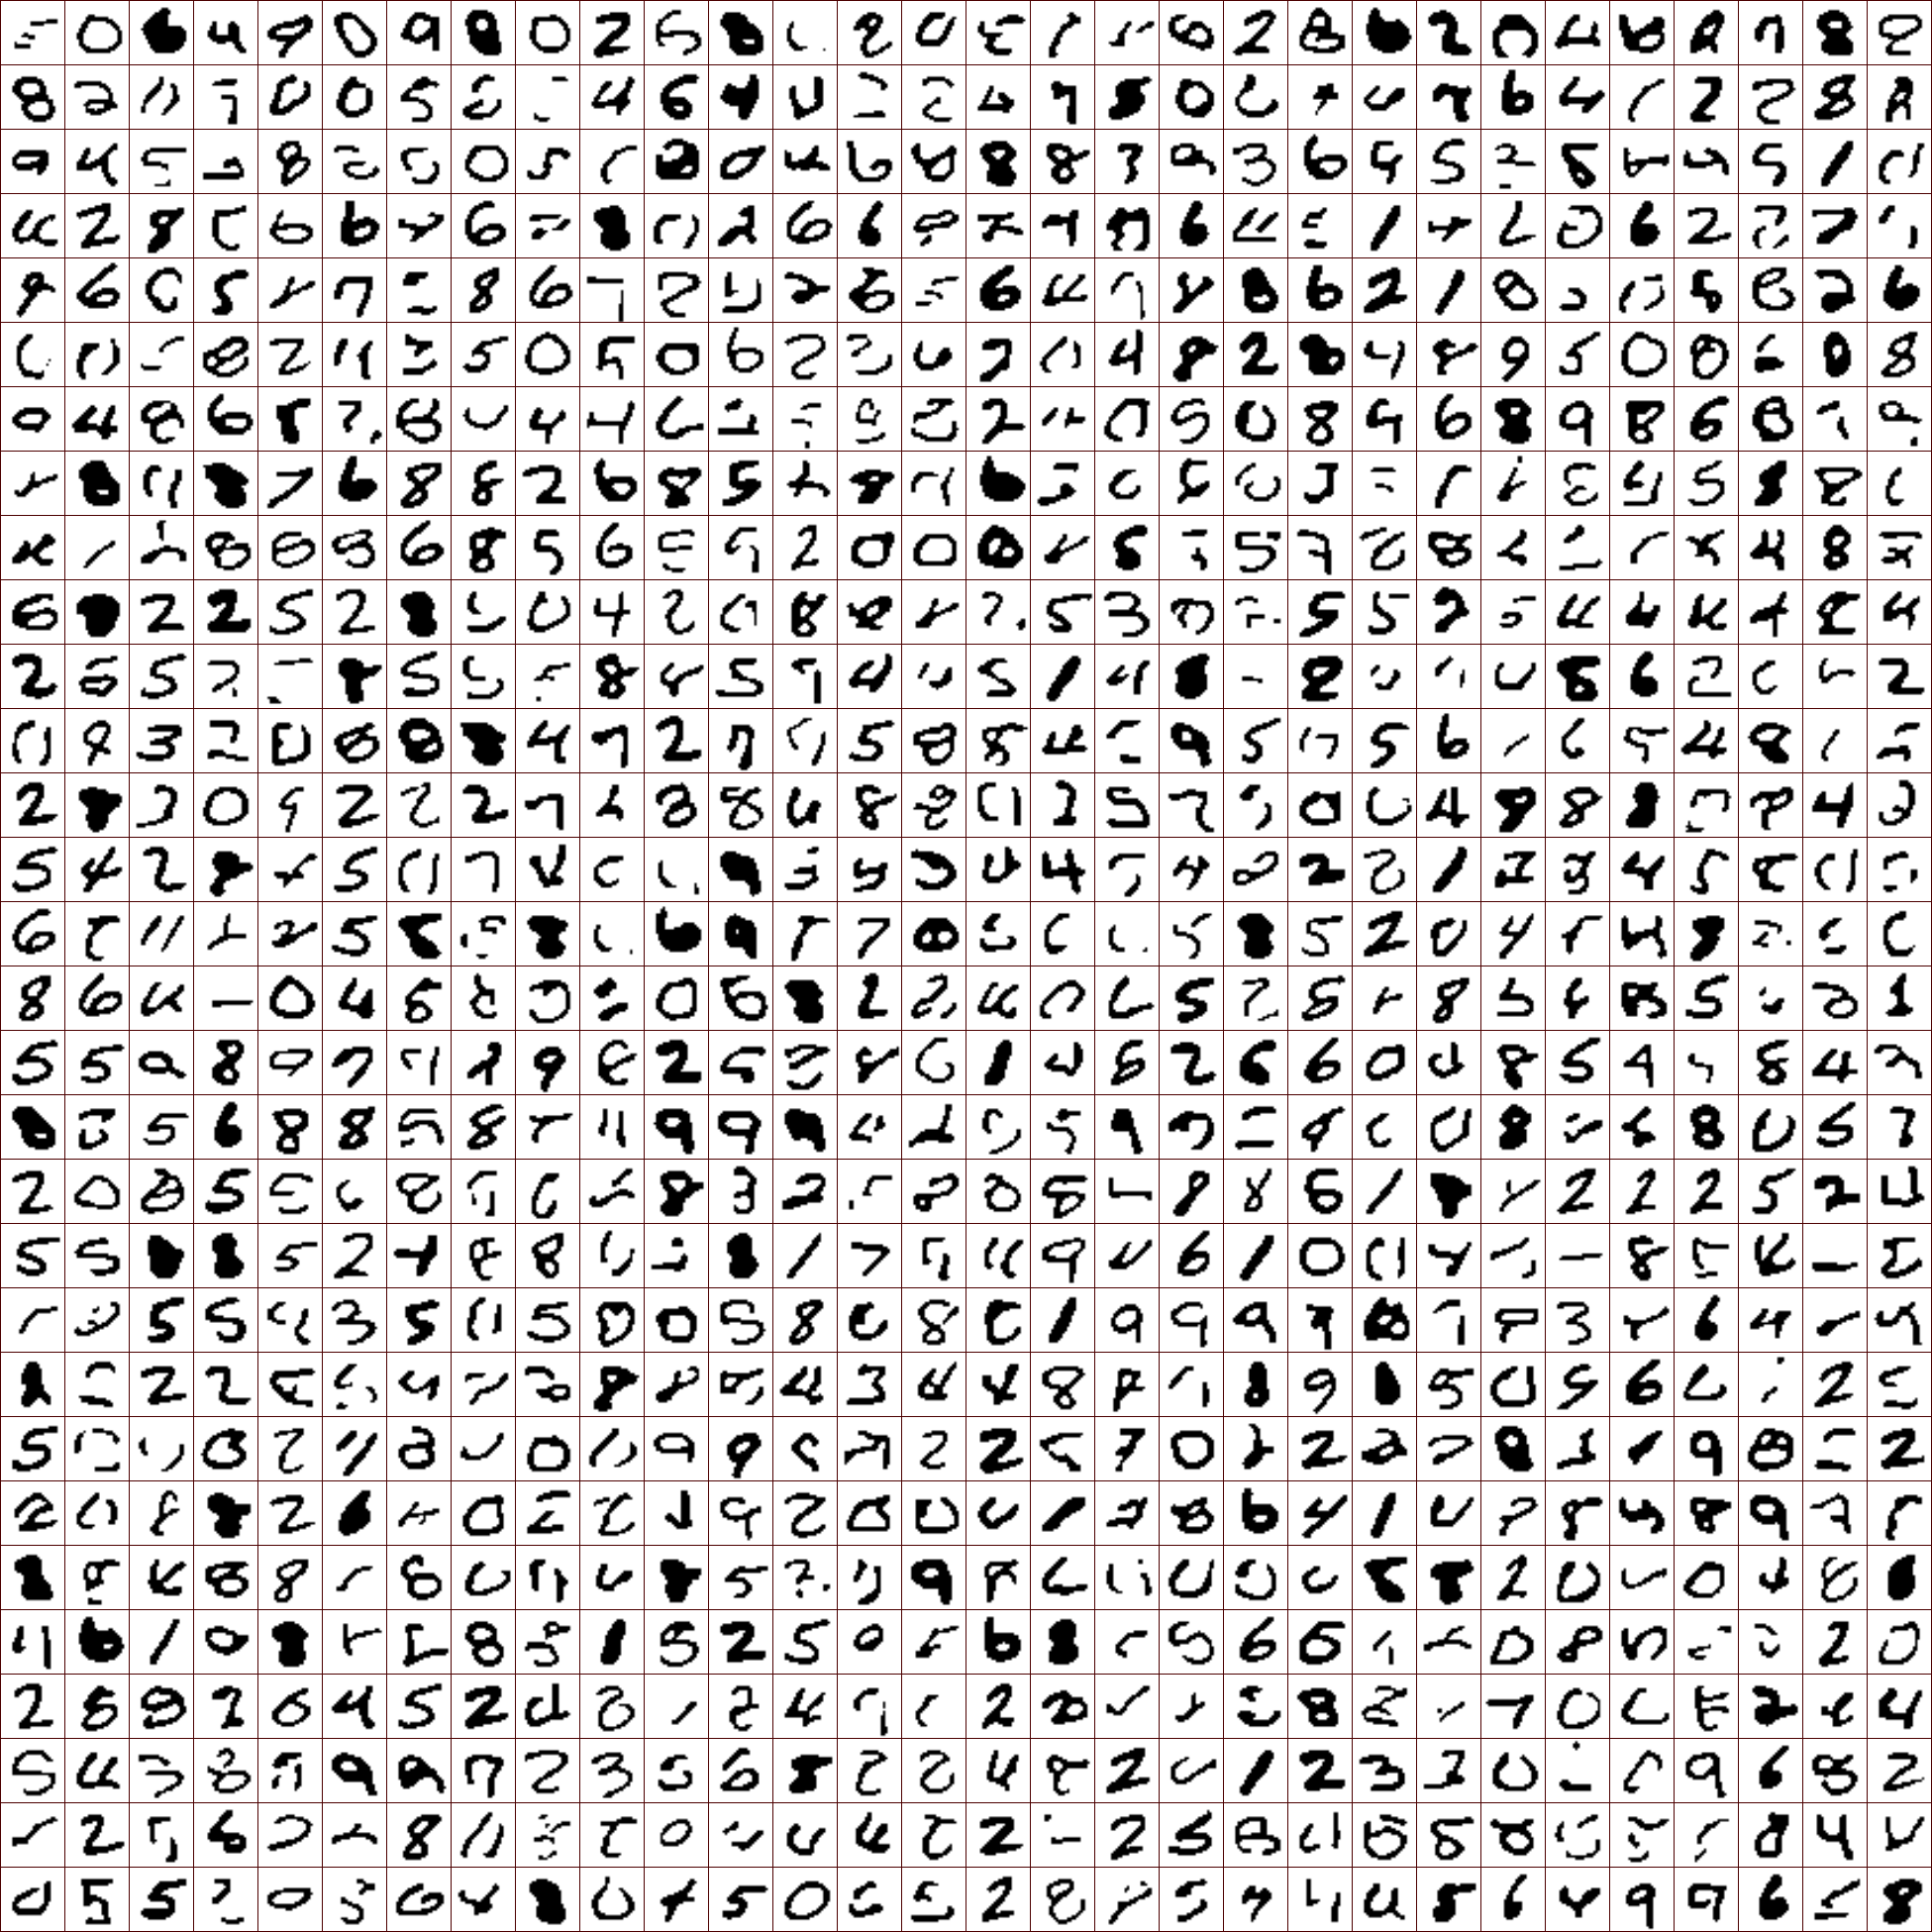

In [101]:
indices = np.argsort(ent, axis=0)
X_sorted = X[indices]
img = disp_grid(1-X_sorted[0:30*30], border=1, bordercolor=(0.3, 0, 0))
imsave('out.png', img)
Image('out.png')